In [2]:
#!/usr/bin/env python3


#The basics
import pandas as pd
import numpy as np
import json

#Plotting
import matplotlib.pyplot as plt
import FCPython 


#Decide which league to load
#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open('Wyscout/events_England.json') as f:
    data = json.load(f)
    
#Create a data set of shots.
train_events = pd.DataFrame(data)
train_events["half"] = np.array(train_events["matchPeriod"]=="2H").astype(int)
train_events["abs_sec"]= train_events["eventSec"] + 60*45* train_events["half"]  
#Decide which league to load
#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open('Wyscout/matches_England.json') as f:
    data = json.load(f)
    
#Create a data set of shots.
train_matches = pd.DataFrame(data)

#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open('Wyscout/teams.json') as f:
    data = json.load(f)
    
#Create a data set of shots.
teams = pd.DataFrame(data)

#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2


In [3]:
#!/usr/bin/env python3


#The basics
import pandas as pd
import numpy as np
import json

#Plotting
import matplotlib.pyplot as plt
import FCPython 
import matplotlib

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(json.__version__)
print(FCPython.__version__)





1.2.5
1.19.2
3.0.2
2.0.9


AttributeError: module 'FCPython' has no attribute '__version__'

In [78]:
#under
goals_direct=[]
for i,shot in corners.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==301:
                goals_direct.append(shot)
#under
goals_direct =pd.DataFrame(goals_direct)
len(goals_direct)

49

In [3]:
with open('Wyscout/players.json') as f:
    data = json.load(f,encoding='utf-8')
    
#Create a data set of shots.
players = pd.DataFrame(data)


In [4]:
event_names = set(train_events["eventName"])
free_kicks = train_events[train_events["eventName"]=="Free Kick"]
corners =  free_kicks[free_kicks["subEventName"]=="Corner"]

shots = train_events[train_events["eventName"]=="Shot"]
goals=[]
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==101:
                goals.append(shot)
for i,shot in free_kicks.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==101:
                goals.append(shot)                

goals=pd.DataFrame(goals)
matches_id = set(train_events["matchId"])


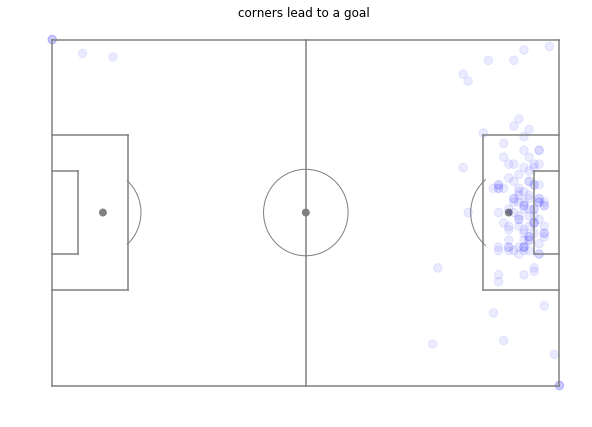

length of y is  129
length of x is 129


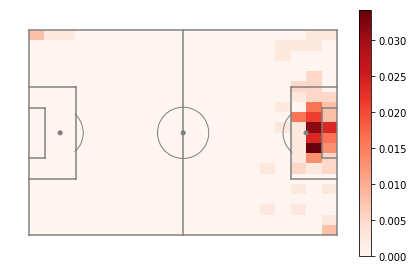

In [42]:
from FCPython import createPitch
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

def calculate_danger_corners (goals_window,events):
    event_names = set(events["eventName"])
    free_kicks = events[events["eventName"]=="Free Kick"]
    corners =  free_kicks[free_kicks["subEventName"]=="Corner"]
    matches_id = set(train_events["matchId"])

    shots = events[events["eventName"]=="Shot"]
    goals=[]
    for i,shot in shots.iterrows():
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    goals.append(shot)
    for i,shot in free_kicks.iterrows():
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    goals.append(shot)                

    goals=pd.DataFrame(goals)
    #Find the passes for each match
    for ic,match_id in enumerate(matches_id):
        #A dataframe of passes
        corners_match = corners[corners["matchId"]==match_id]
        #A dataframe of shots
        shots_match = shots[shots["matchId"]==match_id]
        goals_match = goals[goals["matchId"]==match_id]
        goals_times = goals_match["abs_sec"]
        goals_start = goals_times - goals_window
        corner_times = corners_match["abs_sec"]
        danger_corners = []
        against_goals = []
        corner_times = corners_match["abs_sec"]
        for i , corner in corners_match.iterrows():
            for j , goal in goals_match.iterrows():
                if (corner["abs_sec"] > goal["abs_sec"]- goals_window and corner [ "abs_sec"] < goal ["abs_sec"]):
                    if(corner["teamId"] == goal["teamId"]):
                        danger_corners.append(corner)
                    else:
                        against_goals.append(corner)
        danger_corners = pd.DataFrame(danger_corners)
        against_goals = pd.DataFrame(against_goals)
        
        if ic==0:
            corners_goal =  danger_corners
            against_goals_list = against_goals
        else:
            corners_goal = corners_goal.append(danger_corners)
            against_goals_list = against_goals_list.append(against_goals)


    return (ic + 1,corners_goal,against_goals_list)
number_of_matches, corners_goal ,against_goals= calculate_danger_corners (15,train_events)
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80
plot_passes(corners_goal)   
make_heatmap(corners_goal)

In [8]:
def plot_passes(corners_goal):    
    #Size of the pitch in yards (!!!)
    pitchLengthX=120
    pitchWidthY=80
    #Plot the passes
    (fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
    for i,the_corner in corners_goal.iterrows():
        x=the_corner['positions'][1]["x"]*1.2
        y=pitchWidthY-the_corner['positions'][1]["y"]*0.8
        passCircle=plt.Circle((x,y),1,color="blue")      
        passCircle.set_alpha(.08)   
        ax.add_patch(passCircle)

    ax.set_title('corners lead to a goal ')
    fig.set_size_inches(10, 7)
    plt.show()

In [9]:
def make_heatmap(corners_goal):
    x=[]
    y=[]
    for i,the_corner in corners_goal.iterrows():
        x.append(the_corner['positions'][1]["x"]*1.2)
        y.append(pitchWidthY-the_corner['positions'][1]["y"]*0.8)
    print("length of y is ", len(y))
    print("length of x is",len(x))
    #Make a histogram of passes
    H_corners=np.histogram2d(y, x,bins=20,range=[[0, pitchWidthY],[0, pitchLengthX]])
    from FCPython import createPitch
    (fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
    pos=ax.imshow(H_corners[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
    fig.colorbar(pos, ax=ax)
    #ax.set_title('Danger passes per match by ' + team_required)
    plt.xlim((-1,121))
    plt.ylim((83,-3))
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [10]:
from collections import Counter
def calculate_long_short_corners(corners_goal):
    short_corners = []
    long_corners = []
    for i, corner in corners_goal.iterrows():
        if(corner["positions"][1]["y"] > 81 or corner["positions"][1]["y"] <19):
            short_corners.append(corner)
        else:
            long_corners.append(corner)
    return(long_corners,short_corners)
    
long_corners,short_corners = calculate_long_short_corners(corners_goal)
print(len(corners_goal))    
print(len(short_corners))
print(len(long_corners))
######
#15 sec
#112 long
#17 short
#####
######
#30 sec
#129 long
#22 short
#####
######
#45 sec
#151 long
#24 short
#####
######
#60 sec
#166 long
#25 short
#####



129
17
112


In [11]:
def get_match_by_id(match_id,matches):
    return(matches[matches["wyId"]==match_id])
def get_team_by_id(team_id,teams):
    return(teams[teams["wyId"]==team_id])
def get_player_by_id(player_id,players):
    return(players[players["wyId"]==player_id])

In [12]:
def get_all_teams_id (events):
    teams_id = set(events["teamId"])
    return (teams_id)
    

In [13]:
def initialize_teams(teams_id):
    team_to_cornergoals = dict()
    for team_id in teams_id:
        team_to_cornergoals[team_id] = 0
    return(team_to_cornergoals)
    
    
      

In [14]:
def get_number_of_gaols_by_id(corners_goal,team_to_cornergoals):
    for i ,goal in corners_goal.iterrows():
    
        team_to_cornergoals[goal["teamId"]] +=1
    return(team_to_cornergoals)

In [15]:
def conver_teamsid_to_teamsname(team_to_cornergoals):
    
    teamname_to_cornergoals = dict()
    for key, value in team_to_cornergoals.items():
        print(key,value)

        name = np.array(teams[teams["wyId"]== key]["name"])[0]
        teamname_to_cornergoals[name] = value
    return(teamname_to_cornergoals)
    

In [16]:
 def calculate_goal_percentage(team_to_cornergoals,team_to_corners):
    corners_to_goal_percentage =dict()
    for key,value in team_to_cornergoals.items():
        corners_to_goal_percentage[key] = value / team_to_corners[key]
    return(corners_to_goal_percentage)
    

In [17]:
long_corners,short_corners = calculate_long_short_corners(corners_goal)
print(len(corners_goal))    
print(len(short_corners))
print(len(long_corners))
######
#15 sec
#112 long
#17 short
#####
######
#30 sec
#129 long
#22 short
#####
######
#45 sec
#151 long
#24 short
#####
######
#60 sec
#166 long
#25 short
#####


129
17
112


In [18]:
#deterimine the corners that led to a goal
number_of_matches, corners_goal ,against_goals= calculate_danger_corners (15,train_events)
#get all of teams id
teams_id = get_all_teams_id(corners_goal)
#initialize a dict of teams id and 0 goals
team_to_cornergoals_initial =  initialize_teams(teams_id)
#calculate the number of corners that led to a gaol by team id 
team_to_cornergoals = get_number_of_gaols_by_id(corners_goal,team_to_cornergoals_initial)
#initialize a dict of teams id and 0 corners
team_to_corners_initial =  initialize_teams(teams_id)
#calculate the number of corners by team id
teams_to_corners = get_number_of_gaols_by_id(corners,team_to_corners_initial)
#calculate the percentage of a goal scored given a corner
team_to_goal_percentage = calculate_goal_percentage(team_to_cornergoals,teams_to_corners)
#conver id to name for both number of goals and percentage
teamname_to_cornergoals = conver_teamsid_to_teamsname(team_to_cornergoals)
teamname_to_corner_percentage = conver_teamsid_to_teamsname(team_to_goal_percentage)


1673 3
10531 8
1609 8
1610 5
1611 5
1612 9
1613 7
1619 7
1623 3
1624 4
1625 10
1627 11
1628 6
1631 7
1633 7
1639 7
1644 6
1646 3
1651 3
1659 10
1673 0.01818181818181818
10531 0.05333333333333334
1609 0.035555555555555556
1610 0.021834061135371178
1611 0.02304147465437788
1612 0.03896103896103896
1613 0.04216867469879518
1619 0.030837004405286344
1623 0.02
1624 0.016194331983805668
1625 0.03508771929824561
1627 0.062146892655367235
1628 0.028708133971291867
1631 0.034482758620689655
1633 0.043478260869565216
1639 0.051470588235294115
1644 0.03260869565217391
1646 0.017964071856287425
1651 0.018404907975460124
1659 0.045871559633027525


In [19]:
teamname_to_corner_percentage

{'Huddersfield Town': 0.01818181818181818,
 'Swansea City': 0.05333333333333334,
 'Arsenal': 0.035555555555555556,
 'Chelsea': 0.021834061135371178,
 'Manchester United': 0.02304147465437788,
 'Liverpool': 0.03896103896103896,
 'Newcastle United': 0.04216867469879518,
 'Southampton': 0.030837004405286344,
 'Everton': 0.02,
 'Tottenham Hotspur': 0.016194331983805668,
 'Manchester City': 0.03508771929824561,
 'West Bromwich Albion': 0.062146892655367235,
 'Crystal Palace': 0.028708133971291867,
 'Leicester City': 0.034482758620689655,
 'West Ham United': 0.043478260869565216,
 'Stoke City': 0.051470588235294115,
 'Watford': 0.03260869565217391,
 'Burnley': 0.017964071856287425,
 'Brighton & Hove Albion': 0.018404907975460124,
 'AFC Bournemouth': 0.045871559633027525}

In [43]:
number_of_matches, corners_goal_15 ,against_goals_15= calculate_danger_corners (15,train_events)
number_of_matches, corners_goal_30 ,against_goals_30= calculate_danger_corners (30,train_events)
number_of_matches, corners_goal_45 ,against_goals_45= calculate_danger_corners (45,train_events)
number_of_matches, corners_goal_60 ,against_goals_60= calculate_danger_corners (60,train_events)
  
   


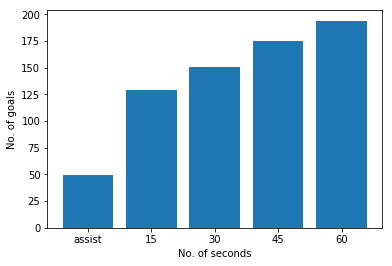

In [80]:
# creating the dataset 
seconds = list(["assist","15","30","45","60"])
number_of_goals_15 = len (corners_goal_15)
number_of_goals_30=  len (corners_goal_30)
number_of_goals_45 = len (corners_goal_45)
number_of_goals_60 = len (corners_goal_60)

goals = list([49,number_of_goals_15,number_of_goals_30,number_of_goals_45,number_of_goals_60])
   

plt.bar(seconds, goals, width=0.8, bottom=None, align='center', data=None)
plt.xlabel("No. of seconds") 
plt.ylabel("No. of goals") 
plt.show() 

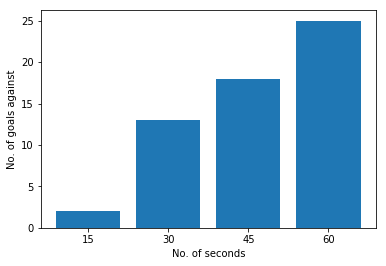

In [72]:
# creating the dataset 
seconds = list(["15","30","45","60"])
number_of_goals_against_15 = len (against_goals_15)
number_of_goals_against_30=  len (against_goals_30)
number_of_goals_against_45 = len (against_goals_45)
number_of_goals_against_60 = len (against_goals_60)

goals = list([number_of_goals_against_15,number_of_goals_against_30,number_of_goals_against_45,number_of_goals_against_60])
   

plt.bar(secods, goals, width=0.8, bottom=None, align='center', data=None)
plt.xlabel("No. of seconds") 
plt.ylabel("No. of goals against") 
plt.show() 

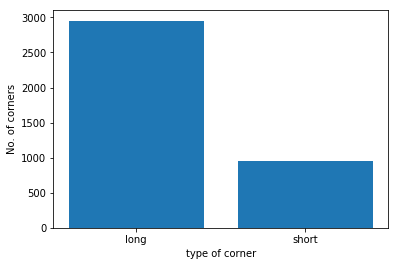

In [61]:
long_corners,short_corners = calculate_long_short_corners(corners)
plt.bar(["long","short"], [len(long_corners_15),len(short_corners_15)], width=0.8, bottom=None, align='center', data=None)
plt.xlabel("type of corner") 
plt.ylabel("No. of corners") 
plt.show() 

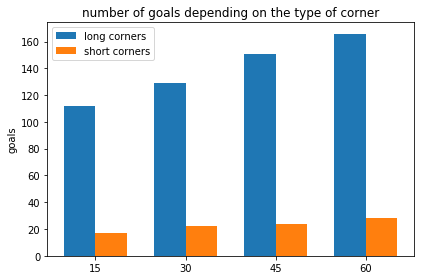

In [58]:
long_corners_goals_15,short_corners_goals_15 = calculate_long_short_corners(corners_goal_15)
long_corners_goals_30,short_corners_goals_30 = calculate_long_short_corners(corners_goal_30)
long_corners_goals_45,short_corners_goals_45 = calculate_long_short_corners(corners_goal_45)
long_corners_goals_60,short_corners_goals_60 = calculate_long_short_corners(corners_goal_60)

long_corners_goals_list = list([len(long_corners_goals_15),len(long_corners_goals_30),len(long_corners_goals_45),len(long_corners_goals_60)])
short_corners_goals_list = list([len(short_corners_goals_15),len(short_corners_goals_30),len(short_corners_goals_45),len(short_corners_goals_60)])
width = 0.35
x = np.arange(len(seconds))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, long_corners_list, width, label='long corners')
rects2 = ax.bar(x + width/2, short_corners_list, width, label='short corners')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('goals')
ax.set_title('number of goals depending on the type of corner')
ax.set_xticks(x)
ax.set_xticklabels(seconds)
ax.legend()



fig.tight_layout()

plt.show()

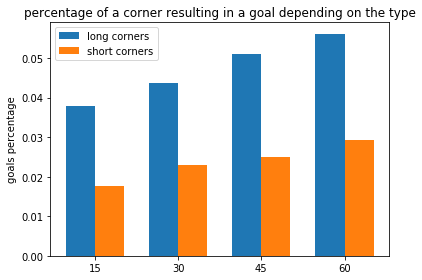

In [64]:
long_corners_goal_percentage_15 = len(long_corners_goals_15)/len(long_corners)
long_corners_goal_percentage_30 = len(long_corners_goals_30)/len(long_corners)
long_corners_goal_percentage_45 = len(long_corners_goals_45)/len(long_corners)
long_corners_goal_percentage_60 = len(long_corners_goals_60)/len(long_corners)

short_corners_goal_percentage_15 = len(short_corners_goals_15)/len(short_corners)
short_corners_goal_percentage_30 = len(short_corners_goals_30)/len(short_corners)
short_corners_goal_percentage_45 = len(short_corners_goals_45)/len(short_corners)
short_corners_goal_percentage_60 = len(short_corners_goals_60)/len(short_corners)

long_corners_goals_list_percentage = list([long_corners_goal_percentage_15,long_corners_goal_percentage_30,long_corners_goal_percentage_45,long_corners_goal_percentage_60])

short_corners_goals_list_percentage = list([short_corners_goal_percentage_15,short_corners_goal_percentage_30,short_corners_goal_percentage_45,short_corners_goal_percentage_60])
width = 0.35
x = np.arange(len(seconds))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, long_corners_goals_list_percentage, width, label='long corners')
rects2 = ax.bar(x + width/2, short_corners_goals_list_percentage, width, label='short corners')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('goals percentage')
ax.set_title('percentage of a corner resulting in a goal depending on the type')
ax.set_xticks(x)
ax.set_xticklabels(seconds)
ax.legend()



fig.tight_layout()

plt.show()

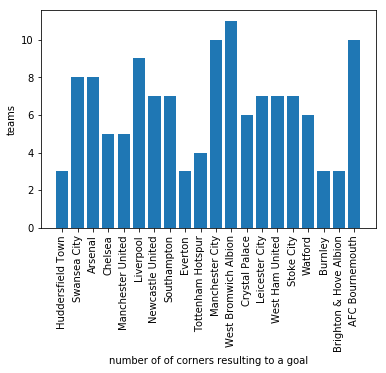

In [73]:

plt.bar(teamname_to_cornergoals.keys(), teamname_to_cornergoals.values(), width=0.8, bottom=None, align='center', data=None)
plt.xlabel("number of of corners resulting to a goal")
plt.xticks(rotation=90)

plt.ylabel("teams") 
plt.show() 

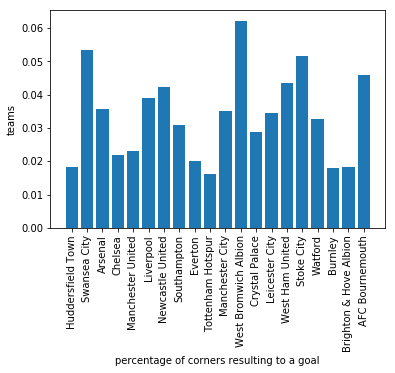

In [74]:
teamname_to_corner_percentage
plt.bar(teamname_to_corner_percentage.keys(), teamname_to_corner_percentage.values(), width=0.8, bottom=None, align='center', data=None)
plt.xlabel("percentage of corners resulting to a goal")
plt.xticks(rotation=90)
plt.ylabel("teams") 
plt.show() 

In [6]:
train_events

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,half,abs_sec
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609,0,2.758649
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609,0,4.946850
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609,0,6.542188
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609,0,8.143395
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609,0,10.302366
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609,0,12.548934
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631,0,13.961228
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631,0,14.765321
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609,0,14.765321
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609,0,15.320341
